# 1. Importing the required packages

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve, auc

# Understanding The Dataset

In [2]:
# Load the dataset
df = pd.read_csv("financial_transaction_log.csv")

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
#check the data columns and rows
df.shape

(6362620, 11)

In [6]:
#checking the columns or variables in the dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
#idnetifying the column types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset contains 10,000 records with 8 variables or columns:
•step: Time in hours.
•type: transaction type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
•amount: transaction amount in local currency
•nameOrig: customer who initiated the transaction
•oldbalanceOrg: Initial balance before the transaction.
•newbalanceOrig: New balance after transaction
•nameDest: transaction recepient ID.
•oldbalanceDest: Initial recipient balance before the transaction
•newbalanceDest: Recepient balance after the transaction
•isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)
•isFlaggedFraud: flags illegal attempts to transfer more than 200.000 in a single transaction.

In [9]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# Handling missing values
df.dropna(inplace=True) # Drop rows with missing values
df.shape
# After dropping the missing values' rows the number of rows remains 
# 10,000 implying that there are no missing values in the dataset.

(6362620, 11)

# 3.Exploratory Data Analysis

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
x=df['isFraud']

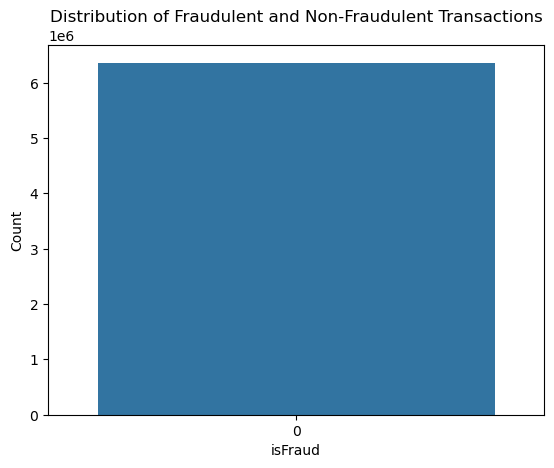

In [13]:
# Visualize the distribution of the target variable (isFraud)
sns.countplot(x)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

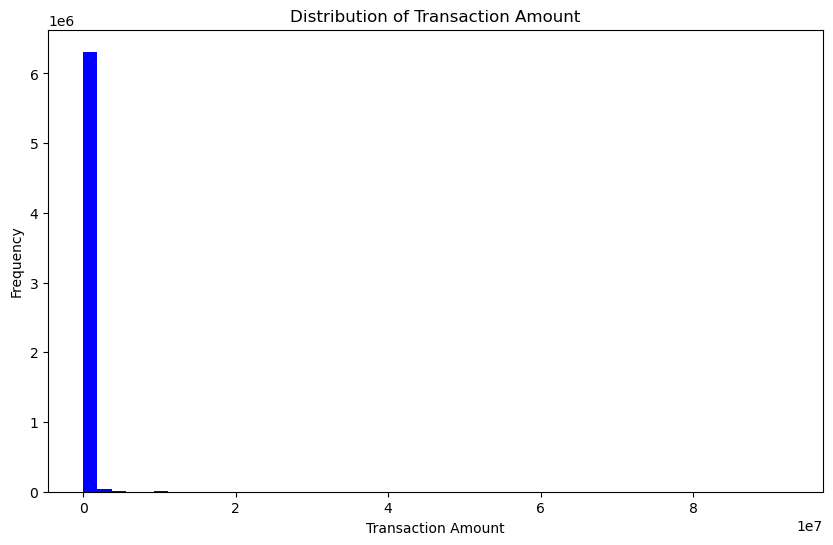

In [14]:
# Explore the distribution of 'amount' column using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=50, color='blue')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()

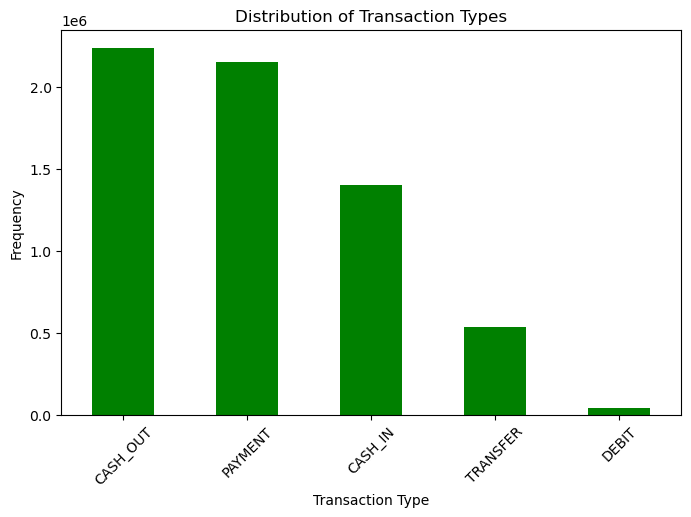

In [15]:
# Explore the distribution of 'type' column using a bar plot
plt.figure(figsize=(8, 5))
df['type'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

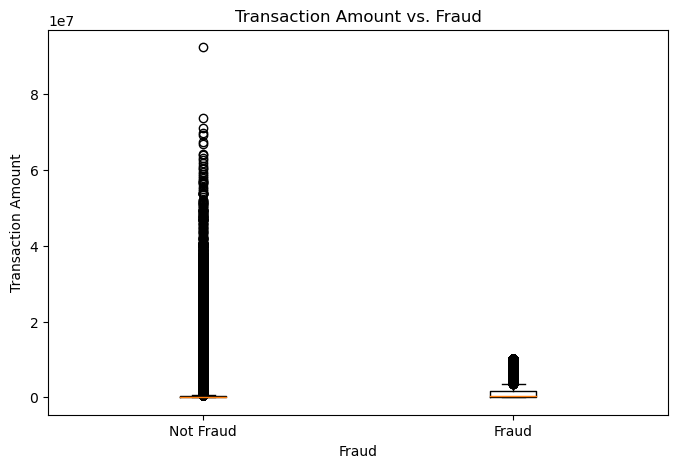

In [16]:
# Explore the relationship between 'amount' and 'isFraud' using a box plot
plt.figure(figsize=(8, 5))
plt.boxplot([df[df['isFraud'] == 0]['amount'], df[df['isFraud'] == 1]['amount']], labels=['Not Fraud', 'Fraud'])
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Fraud')
plt.show()

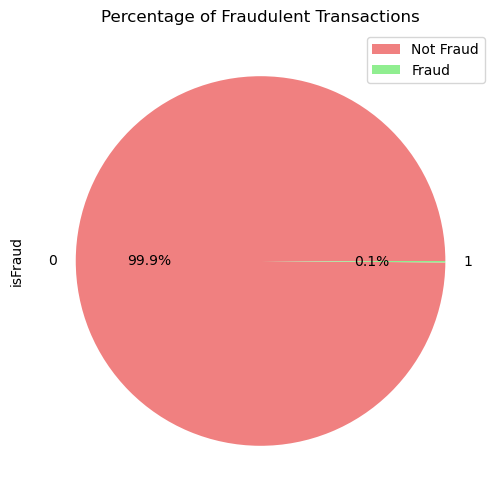

In [17]:
# Explore the distribution of 'isFraud' using a pie chart
plt.figure(figsize=(6, 6))
df['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of Fraudulent Transactions')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()

In [18]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])


In [19]:
# Remove unnecessary columns
df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [20]:
# Perform one-hot encoding on categorical variables
categorical_cols = ['type']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [21]:
# Split the dataset into features (X) and labels (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine learning algorithms for fraud detection

In [24]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [25]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

In [ ]:
from sklearn.cluster import KMeans
# Clustering for anomaly detection
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train_scaled)
kmeans_predictions = kmeans_model.predict(X_test_scaled)

In [ ]:
print("Random Forest:")
print(classification_report(y_test, rf_predictions))
print("Support Vector Machine:")
print(classification_report(y_test, svm_predictions))
print("K-Means Clustering:")
print(classification_report(y_test, kmeans_predictions))

In [ ]:
# ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.decision_function(X_test)
kmeans_probs = kmeans_model.transform(X_test)[:, 1]

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
kmeans_fpr, kmeans_tpr, _ = roc_curve(y_test, kmeans_probs)
In [142]:
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine')
plt.plot(kmeans_fpr, kmeans_tpr, label='K-Means Clustering')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()